
# IT44 TP2: Interpolation polynomiale
---

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/interpolation.png'  width="500px">
            
    </tr>
</table>

Dans ce second TP vous allez implémenter la plupart des procédures vues en cours et TD concernant le chapitre 1 sur l'interpolation polynomiale. Une fois implémenter des algorithmes permettant de construire le polynôme d'interpolation, vous ferez des tests et appliquerez vos résultats à des cas concret. 



## Evaluation de polynômes

Dans un premier temps on s'intéresse à l'évaluation des polynômes.
1. Ecrire une première fonction ```Eval(C,A,t)``` qui étant donnée un vecteur de $n+1$ valeurs $(a_0,\dots,a_{n})$, un vecteur de $n$ centres $(c_1,\dots, c_n)$ et une valeur $t\in \mathbb{R}$, calcule 
$$p(t)=a_0+a_1\times(t-c_1)+a_2(t-c_1)(t-c_2)+\dots a_n \prod_{i=1}^n (t-c_i)$$
Cette première fonction calculera cette évaluation de la manière la plus naïve possible en calculant:
$$p(t)=\sum_{i=0}^n a_i \prod_{j=1}^i (t-c_j).$$
(on adoptera la convention suivante: $\prod_{j=1}^0=1$.
2. Proposer une seconde fonction ```EvalH(C, A,t)``` qui utilise l'algorithme de Hörner vue en cours.
3. Mesurer et comparer les temps d'execution des deux algorithmes. Pour cela vous pourrez utiliser la séquence suivante et faire des tests sur des polynômes choisis aléatoirement:
```Python
import time
start_time = time.time()
main()
print("---%s seconds ---" % (time.time() - start_time))
```

In [40]:
import time

def Eval(C,A,t):
    res = 0
    n = len(A)
    for i in range(n):
        res+=A[i]
        for j in range(i):
            if i == 0 : res+=0
            else : res*=t-C[j]
    return res

start_time = time.time()
print(Eval(
    [1,2,3,4], #C
    [3,4,3,4,5],   #A
    3     #t   #t
))
print("---%s seconds ---" % (time.time() - start_time))     


0
---0.0008518695831298828 seconds ---


In [41]:
def horner(p, x):
    n = len(p)
    val = p[n-1]
    for i in range(n-2, -1, -1):
        val=val*x+p[i]
    return val

def EvalH(C, A, t):
    n = len(A)
    val = A[n-1]
    for i in range(n-2, -1, -1):
        val = val * (t - C[i]) + A[i]
    return val

start_time = time.time()
print(EvalH(
    [1,2,3,4], #C
    [3,4,3,4,5],   #A
    3     #t
))
print("---%s seconds ---" % (time.time() - start_time))     

17
---0.00031280517578125 seconds ---


## Table des différences divisées

Ecrire un code ```Tab_diff_div(X,Y)``` qui étant donnée un vecteur représentant $n+1$ points de support $X=(x_0,\dots, x_n)$ et les valeurs correspondantes $(y_0,\dots y_n)$ calcule le vecteur des différences divisées correspondant.

In [42]:
import numpy as np

def Tab_diff_div(X,Y):
    n = len(X)
    tab = np.zeros((n,n))
    for i in range(n):
        tab[i][0] = Y[i]
    for j in range(1,n):
        for i in range(0,n-j):
            tab[i][j] = (tab[i+1][j-1]-tab[i][j-1]) / (X[i+j]-X[i])

    return tab

print(
    Tab_diff_div([1,2,4], [-1,0,3])
)

[[-1.          1.          0.16666667]
 [ 0.          1.5         0.        ]
 [ 3.          0.          0.        ]]


## Polynôme d'interpolation

1. Ecrire une fonction ```valf(X)``` qui pour un vecteur $X=(x_0,\dots,x_n)$ renvoie le vecteur $Y=(y_0,\dots,y_n)$ tel que $y_i=f(x_i)$ (on pourra choisir $f(x)=\exp(x)$).
2. Ecrire une fonction ``` Interpol(n,X,Y)``` qui, à partrir de l'entier naturel non nul $n$ et des données $X=(x_0,\dots,x_n)$ et $(y_0,\dots,y_n)$ représentant respectivement des points de support $x_i$ et leurs images $y_i=f(x_i)$ produit le polynôme d'interpolation $p$ de degré $n$ tel que $p(x_i)=y_i$, sous la forme $P=[P[0],P[1]]$ où $P[0]$ est le vecteur des centres de la base de Newton et $P[1]$ est le vecteur des coefficients correspondant.

In [43]:
def valf(f, X):
    res = []
    for i in range(len(X)):
        res.append(f(X[i]))
    return res

exp = lambda x : 2.71**x
print(valf(exp, [1,5,2]))


[2.71, 146.1660310351, 7.3441]


In [44]:
def Interpol(X, Y):
        A = Tab_diff_div(X, Y)[0]
        return [X,A]

Interpol([1,2,4],[-1,0,3])

[[1, 2, 4], array([-1.        ,  1.        ,  0.16666667])]

## Applications

1. Utiliser les codes ci-dessus pour construire $p_{8,1}$ le polynôme d'interpolation de la fonction $\exp$ sur le support $X1$ équiréparti tel que $x_0=-1, x_1=-\frac{3}{4},\dots,x_8=1$.
2. Utiliser les codes ci-dessus pour constuire $p_{8,2}$, le polynôme d'interpolation de la fonction $\exp$ sur le support $X2$ définit par les huits points de Tchebyschev:
$$\forall j\in \{0,\dots,8\}, X2[j]=\cos(\dfrac{(2j+1)\pi}{18})$$
3. Visualiser graphiquement l'erreur commise en valeur absolue lors de l'approximation de la fonction $\exp$ par $p_{8,1}$ et $p_{8,2}$.

Polynome d'interpolation p8,1: [[-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0], array([3.69003690e-01, 4.17780491e-01, 2.36502430e-01, 8.92548448e-02,
       2.52632520e-02, 5.72053566e-03, 1.07945090e-03, 1.74591180e-04,
       2.47086922e-05])] 

Polynome d'interpolation p8,2: [[np.float64(-0.9848077530122081), np.float64(-0.984807753012208), np.float64(-0.8660254037844385), np.float64(-0.6427876096865394), np.float64(-0.3420201433256685), np.float64(6.123233995736766e-17), np.float64(0.3420201433256688), np.float64(0.6427876096865394), np.float64(0.8660254037844387), np.float64(0.984807753012208)], array([ 0.37463512,  0.5       , -0.87129268,  3.18350593, -4.82516503,
        4.92360359, -3.70665512,  2.27803827, -1.2307227 ,  0.62486689])] 



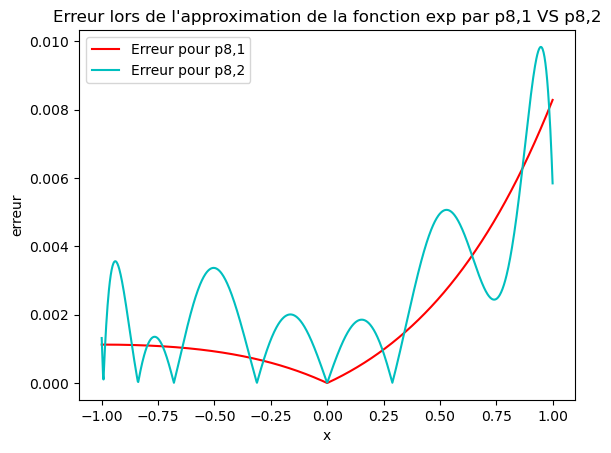

In [45]:
"""
Question 1 
"""

x1 = [-1 + n*0.25 for n in range(9)]
y1 = valf(exp, x1)

p81 = Interpol(x1,y1)
print("Polynome d'interpolation p8,1:",p81,"\n")

"""
Question 2
"""
x2 = [np.cos(((2*n+1)*np.pi)/18) for n in range(9,-1,-1)]
y2 = valf(exp, x2)
p82 = Interpol(x2,y2)
print("Polynome d'interpolation p8,2:",p82,"\n")

"""
Question 3
"""
import matplotlib.pyplot as plt

points = np.linspace(-1,1,1000)

exp_test = [np.exp(x) for x in points]
p81_test = [EvalH(p81[0],p81[1], x) for x in points]
p82_test = [EvalH(p82[0],p82[1], x) for x in points]

err81 = [np.abs(a-b) for a,b in zip(exp_test,p81_test)]
err82 = [np.abs(a-b) for a,b in zip(exp_test,p82_test)]

plt.plot(points, err81, label='Erreur pour p8,1',color='r')
plt.plot(points, err82, label='Erreur pour p8,2',color='c')

plt.xlabel("x")
plt.ylabel("erreur")
plt.legend()
plt.title("Erreur lors de l'approximation de la fonction exp par p8,1 VS p8,2")
plt.show()

## Généralisation

Généraliser ce qui précède pour construire le polynôme d'interpolation d'une fonction $f$ pour un support quelconque (i.e. en autorisant la répétition des points). On supposera que l'on sait dériver $f$ et on pourra construire une fonction ```valdf(\tilde{X})```qui retourne le vecteur des valeurs de la dérivée de $f$ pour un support extrait de $X$.

In [46]:
def derivateAt(f, x):
    h = 1e-6
    return (f(x+h)-f(x))/(h)

def valdf(f, X):
    res = []
    for i in range(len(X)):
        res.append(derivateAt(f, X[i]))
    return res

def General_tab_diff_div(f, X, Y):
    n = len(X)
    tab = np.zeros((n,n))
    for i in range(n):
        tab[i][0] = Y[i]
    for j in range(1,n):
        for i in range(0,n-j):
            if X[i+j] != X[i]:
                tab[i][j] = (tab[i+1][j-1]-tab[i][j-1]) / (X[i+j]-X[i])
            else:
                tab[i][j] = derivateAt(f, X[i])
    return tab

def general_interpol(f, X):
    Y = valf(f, X)
    A = General_tab_diff_div(f, X, Y)[0]
    return [X, A]

### Tests

In [47]:
"""
Question 1 V2
"""

x1 = [-1 + n*0.25 for n in range(9)]

p81 = general_interpol(exp, x1)
print("Polynome d'interpolation p8,1:",p81,"\n")



Polynome d'interpolation p8,1: [[-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0], array([3.69003690e-01, 4.17780491e-01, 2.36502430e-01, 8.92548448e-02,
       2.52632520e-02, 5.72053566e-03, 1.07945090e-03, 1.74591180e-04,
       2.47086922e-05])] 



## Phénomène de Runge

On considère la fonction $f(x)=\dfrac{1}{1+25x^2}$ pour $x\in [-1,1]$ et on considère les supports $X_n=\{x_0,\dots,x_n\}$ tels que $x_0=-1, x_n=1$ et $x_{i+1}=x_i+h$ avec $h=\frac{2}{n}$.

Tracer sur le même graphique la fonction $f$ et plusieurs polynôme d'intepolation $p_n$ pour différentes valeurs de $n$. Qu'observez-vous ?

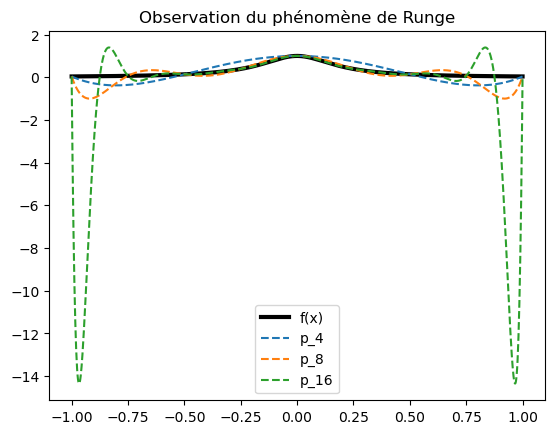

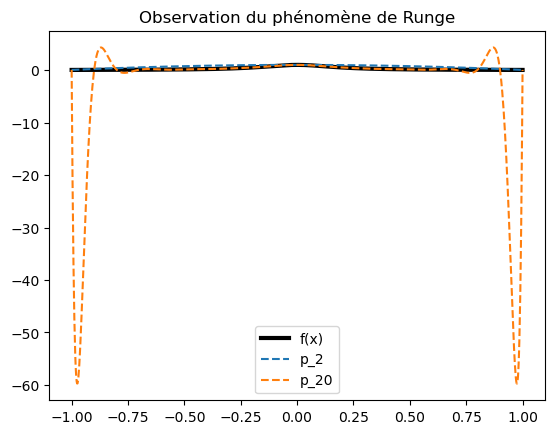

In [104]:
def interpol_poly_gen(N):
    res = []
    f = lambda x: 1/(1+25*(x**2))
    for n in N:
        h = 2 / n
        Xn = np.arange(-1, 1+h, h)
        res.append(general_interpol(f, Xn))
    return res




N = [4, 8, 16]


F = lambda x: 1/(1+25*(x**2))

def plot_and_show(tab):
    t = np.linspace(-1, 1, 1000)
    ft = [F(x) for x in t]
    plt.plot(t, ft, label="f(x)", c="black", linewidth="3")
    for i,poly in enumerate(tab) :
        pt = [EvalH(poly[0], poly[1], x) for x in t]
        plt.plot(t, pt, label=f"p_{N[i]}", linestyle="--")
    plt.title("Observation du phénomène de Runge")
    plt.legend()
    plt.show()
        

plot_and_show(interpol_poly_gen(N))

N = [2, 20]

plot_and_show(interpol_poly_gen(N))



# Observations :

Plus on augmente le degré, plus l'approximation du polynôme d'interpolation est précise vers le centre de l'intervalle, mais on observe aussi l'apparition de plus en plus d'oscilliations aux extrémités qui ressemblent à des "puits".

### Conclusion :

À très haut degré, l'interpolation est plus précise mais aussi plus instable aux bords, et dans le cas inverse, l'interpolation est moins précise mais plus stable.